<img src="pylady_geek.png">

In [15]:
# First we do all the imports
%pylab inline
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
pylab.rcParams['figure.figsize'] = (20.0, 8.0)
#import ....

Populating the interactive namespace from numpy and matplotlib


### Numerical data

In [13]:
# Generate dataset from drawing points from a normal distribution with zero mean and standard deviation=1
np.random.seed(42)
data = np.random.normal(0, 1, (5, 20))
data.shape

(5, 20)

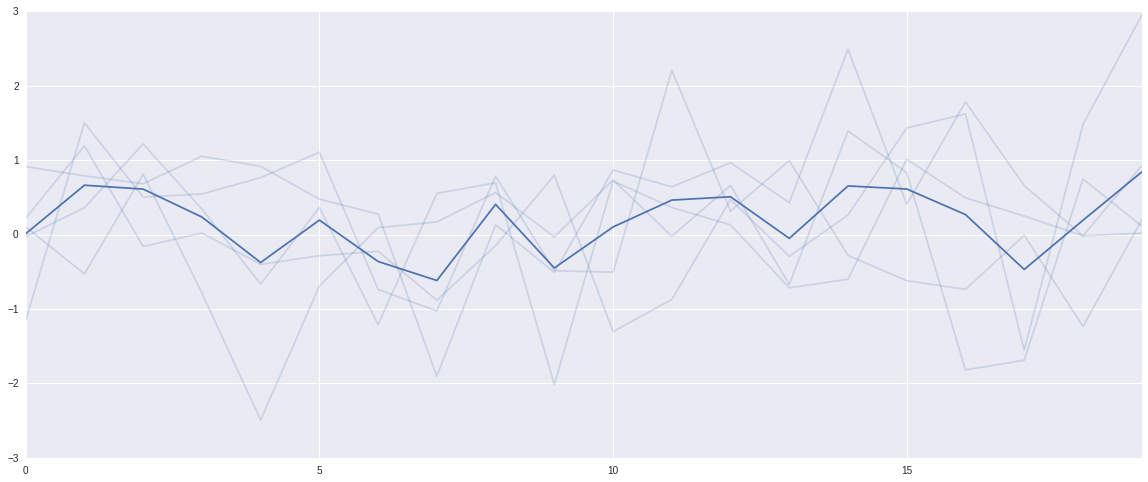

In [16]:
sns.tsplot(data, err_style='unit_traces')

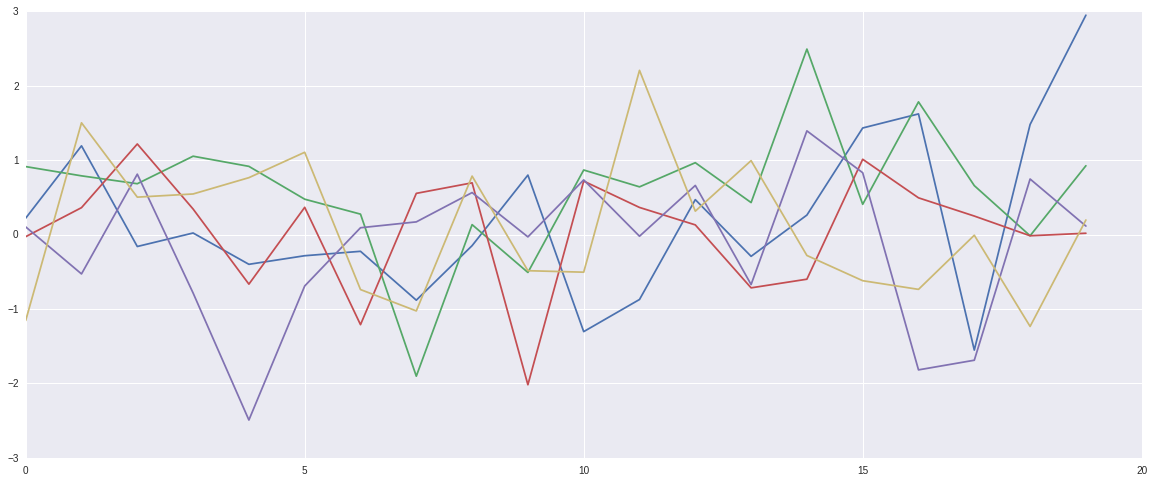

In [17]:
# with matplotlib
plt.plot(data.T)

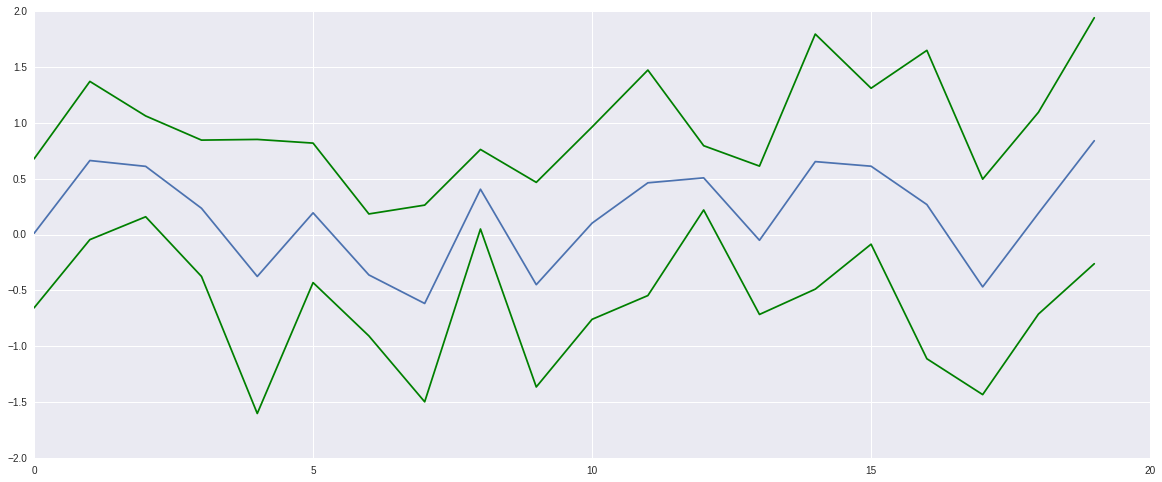

In [18]:
# plot the mean of each trace
data_mean = data.mean(axis=0); 
plt.plot(data_mean)
plt.plot(data_mean-data.std(axis=0), 'g')
plt.plot(data_mean+data.std(axis=0), 'g')

In [19]:
# Result is a tuple
description = stats.describe(data, axis=1)

In [20]:
description.minmax

(array([-1.55221355, -1.90301966, -2.01796133, -2.49235022, -1.23445121]),
 array([ 2.94912227,  2.49341406,  1.21801783,  1.39426207,  2.2075641 ]))

In [21]:
np.sqrt(description.variance)

array([ 1.10279421,  0.85930616,  0.77560303,  1.00238478,  0.94477352])

In [22]:
stats.describe(data.flatten())

DescribeResult(nobs=100, minmax=(-2.4923502245972684, 2.9491222733326525), mean=0.17233067578109829, variance=0.91309832209343467, skewness=-0.14802590289285314, kurtosis=0.5504859214411524)

And something similar can be achieved using pandas

In [23]:
frame = pd.DataFrame(np.random.normal(0, 1, (1000, 5)), columns=['a', 'b', 'c', 'd', 'e'])
frame.describe()

,a,b,c,d,e
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.026575,0.008048,0.016839,0.034060,-0.018381
std,1.014459,0.997368,0.965286,1.000918,0.999798
min,-3.758356,-3.875580,-2.873010,-3.414485,-4.290439
25%,-0.707505,-0.650649,-0.650374,-0.651669,-0.735294
50%,-0.010827,0.014685,0.020628,0.073832,0.033922
75%,0.644255,0.672597,0.662280,0.739632,0.625549
max,3.094362,3.773501,3.156186,3.186570,2.907562


Sometimes you may need to characterize one specific timeseries (and not across a set of timeseries)

In [24]:
time       = np.linspace(0, 15, 100) # [s]
f_baseline = 1.0                     # [s^-1]
N          = 10

# List comprehension works for creating arrays too :)
def generate_timeseries(N, t, f):
    '''Generate array of N x length(t)'''
    d = np.array([i * np.sin(2*np.pi*f*i*t) for i in range(N)])
    return d

data = generate_timeseries(N, time, f_baseline)


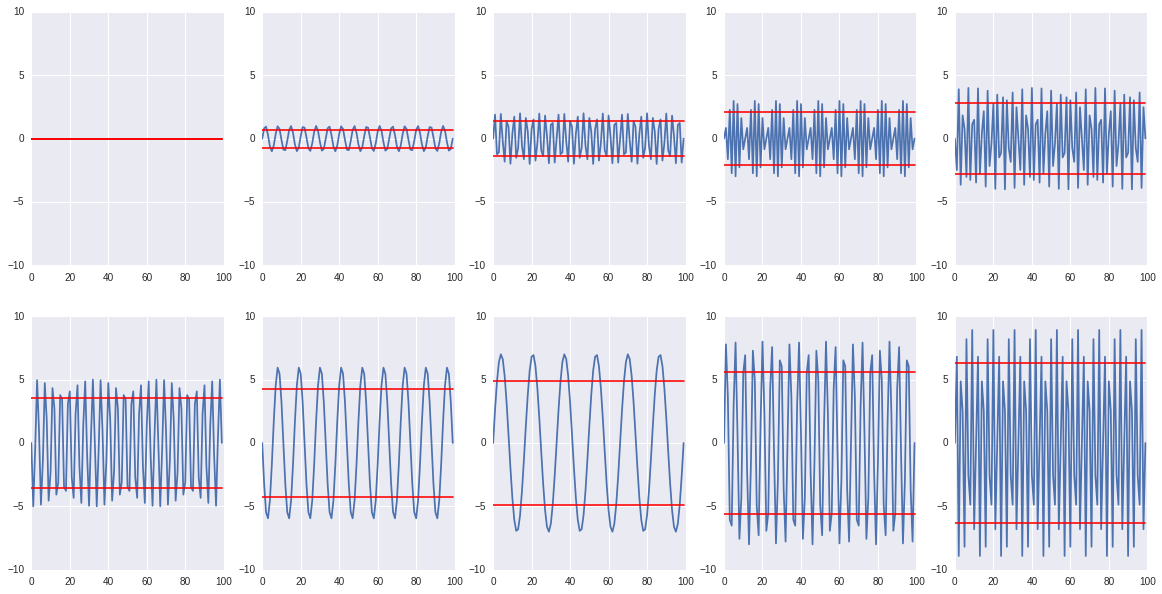

In [25]:
r, c = 2, 5
plt.figure(figsize=(20, 10))
for k in range(r*c):
    plt.subplot(r,c, k+1)
    plt.plot(data[k, :])
    plt.plot(np.tile(data[k, :].std(), len(time)), 'r', alpha=0.9)
    plt.plot(np.tile(- data[k, :].std(), len(time)), 'r', alpha=0.9)
    plt.ylim([-N, N])

##### Correlation and brainnetworks

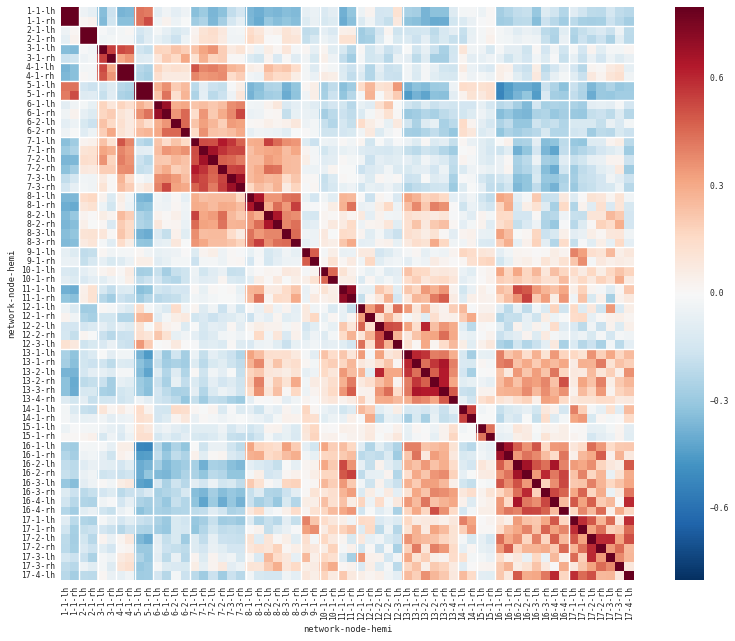

In [26]:
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

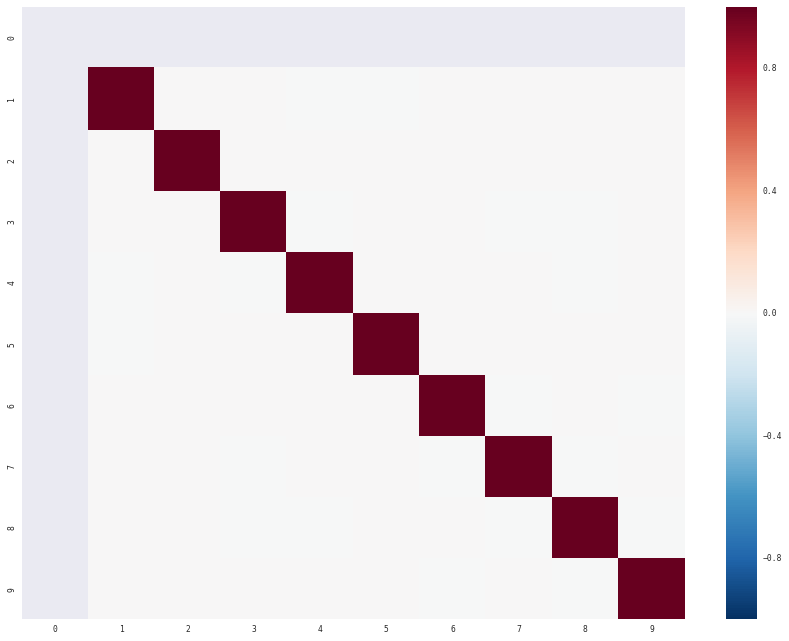

In [27]:
cc = np.corrcoef(data)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cc)
f.tight_layout()

In [34]:
cc

array([[             nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan],
       [             nan,   1.00000000e+00,   1.27395288e-15,
          9.63688538e-16,  -5.11375454e-16,  -1.36725648e-15,
          7.47624932e-18,   8.07434927e-16,   9.91350660e-16,
          3.54473901e-15],
       [             nan,   1.27395288e-15,   1.00000000e+00,
          2.73107388e-15,   2.21596030e-15,   9.40213115e-16,
          2.95610898e-15,   1.05094705e-16,   6.97534062e-16,
          1.62284452e-15],
       [             nan,   9.63688538e-16,   2.73107388e-15,
          1.00000000e+00,  -2.66154476e-15,   2.27876079e-15,
          4.26644628e-16,  -1.65246471e-15,  -1.09228003e-15,
          8.94491697e-16],
       [             nan,  -5.11375454e-16,   2.21596030e-15,
         -2.66154476e-15,   1.00000000e+00,   1.49285747e-15,
          1.42945887e-15

In [28]:
def generate_correlated_timeseries(N, t, f):
    '''Generate array of N x length(t)'''
    d = np.array([i * np.sin(2*np.pi*f*t) for i in range(N)])
    return d

data = generate_correlated_timeseries(N, time, f_baseline)

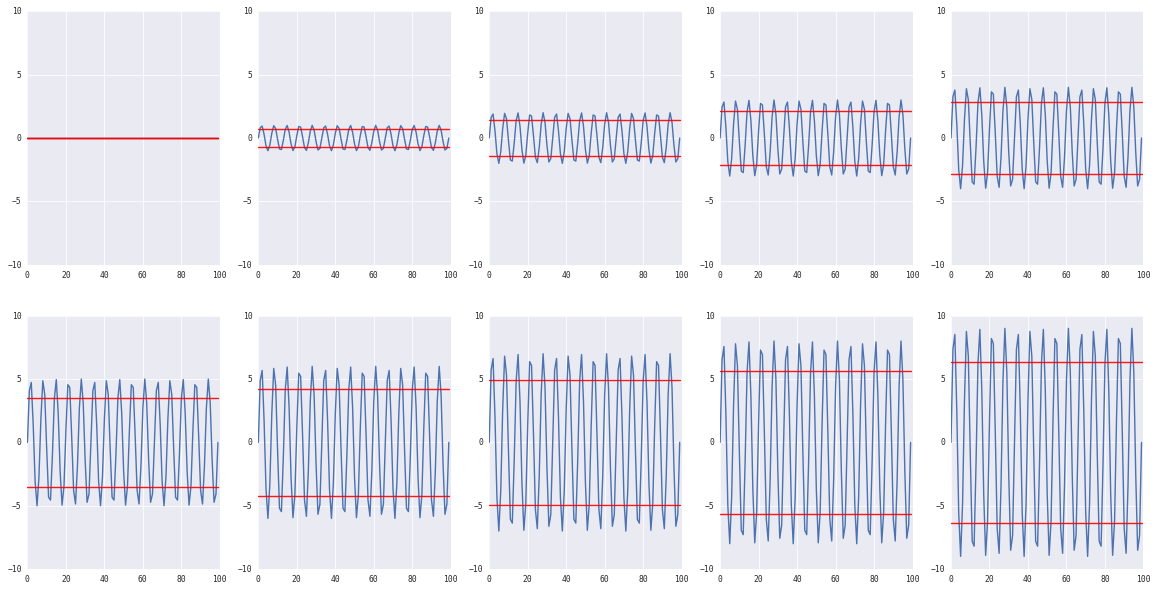

In [29]:
r, c = 2, 5
plt.figure(figsize=(20, 10))
for k in range(r*c):
    plt.subplot(r,c, k+1)
    plt.plot(data[k, :])
    plt.plot(np.tile(data[k, :].std(), len(time)), 'r', alpha=0.9)
    plt.plot(np.tile(- data[k, :].std(), len(time)), 'r', alpha=0.9)
    plt.ylim([-N, N])

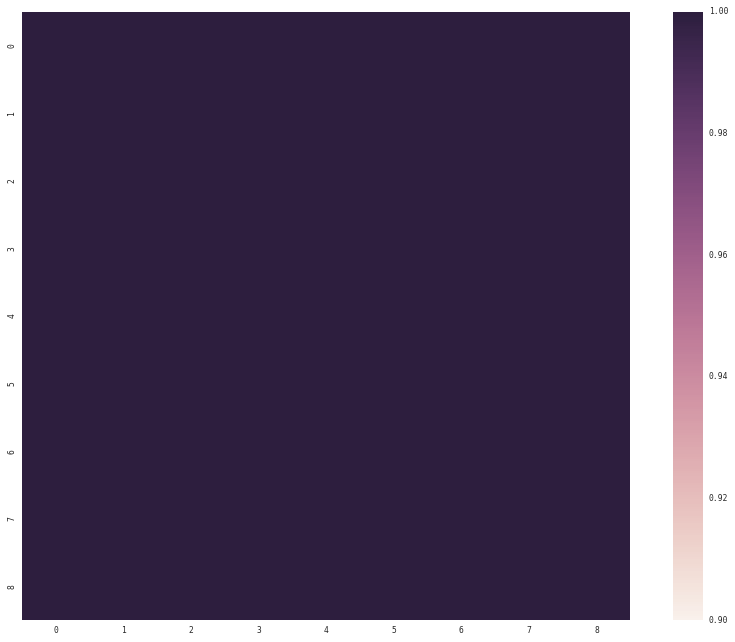

In [111]:
cc = np.corrcoef(data[1:, :])
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cc, vmax=1.0, vmin=0.9, square=True)
f.tight_layout()

### Categorical data

In [2]:
sns.set()
# Load a predefined dataset into a pandas dataframe
df = sns.load_dataset("iris")

It seems that sepal and petal size tend to be related, that is bigger flowers are bigger! In addition there might be a systematic effect of species ...

In this dataset we have 4 variables that are numerical (features) and 3 categories (labels).

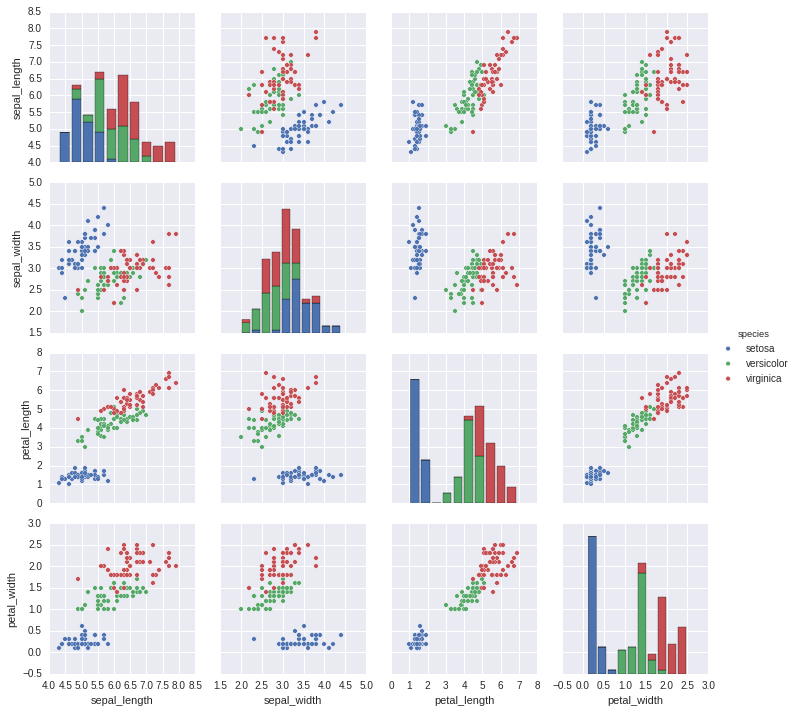

In [9]:
# Pairwise relationship plot
sns.pairplot(df, hue="species")

What are we actually seeing here? 

In [33]:
%load_ext version_information
%version_information numpy, matplotlib, scipy, seaborn, pandas

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 2.7.11 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.0.1
OS Linux 4.1.13 5 default x86_64 with SuSE 42.1 x86_64
numpy 1.10.2
matplotlib 1.5.0
scipy 0.16.1
seaborn 0.6.0
pandas 0.17.1
Thu Dec 17 16:45:52 2015 AEDT